*Importing Essential libraries*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

*Loading The Dataset*

In [ ]:
data = pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


*Exploring The Data*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


*Data Analysis and Visualization*

In [ ]:
def histogram(column_name):
  sns.histplot(data_set=data[column_name],bins=20,kde=True)
  plt.title(column_name+' Distribution')
  plt.show()

In [ ]:
def count_plot(column):
  plt.figure(figsize=(10, 6))
  sns.countplot(x=column, data=data)
  plt.title(f"Count Plot - {column}")
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
def clean_car_name(car_name):
  return car_name.split(" ")[0].lower()

In [ ]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
data['CarName']=data['CarName'].str.replace('vw','Volkswagen')
data['CarName']=data['CarName'].str.replace('vokswagen','Volkswagen')
data['CarName']=data['CarName'].str.replace('toyouta','toyota')
data['CarName']=data['CarName'].str.replace('maxda','mazda')
data['CarName']=data['CarName'].str.replace('porcshe','porsche')

In [ ]:
data['fueltype'].value_counts().reset_index()

,index,fueltype
0,gas,185
1,diesel,20


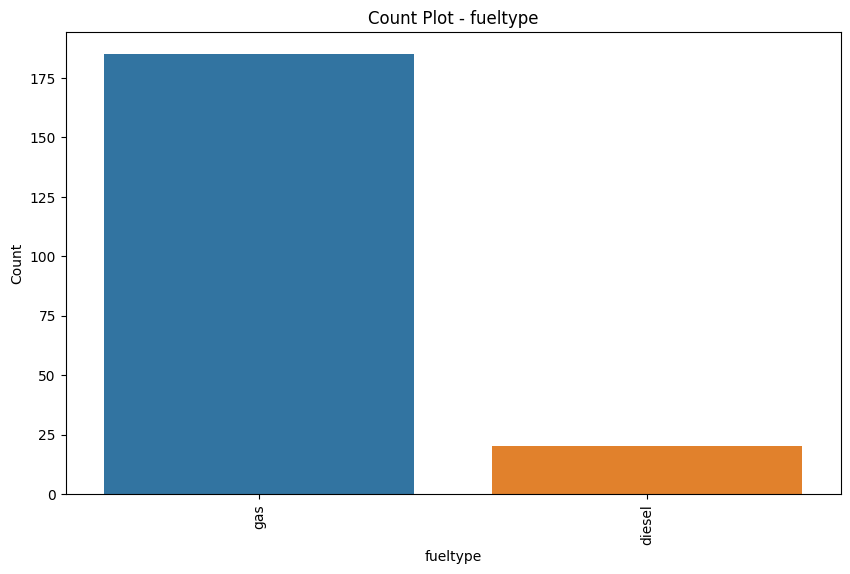

In [ ]:
count_plot('fueltype')

In [ ]:
data['aspiration'].value_counts().reset_index()

,index,aspiration
0,std,168
1,turbo,37


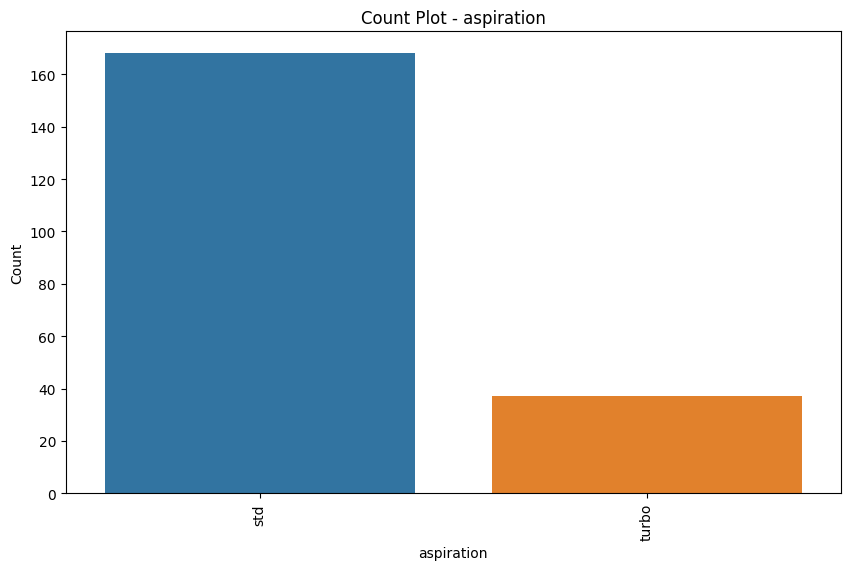

In [ ]:
count_plot('aspiration')

In [ ]:
data['carbody'].value_counts().reset_index()

,index,carbody
0,sedan,96
1,hatchback,70
2,wagon,25
3,hardtop,8
4,convertible,6


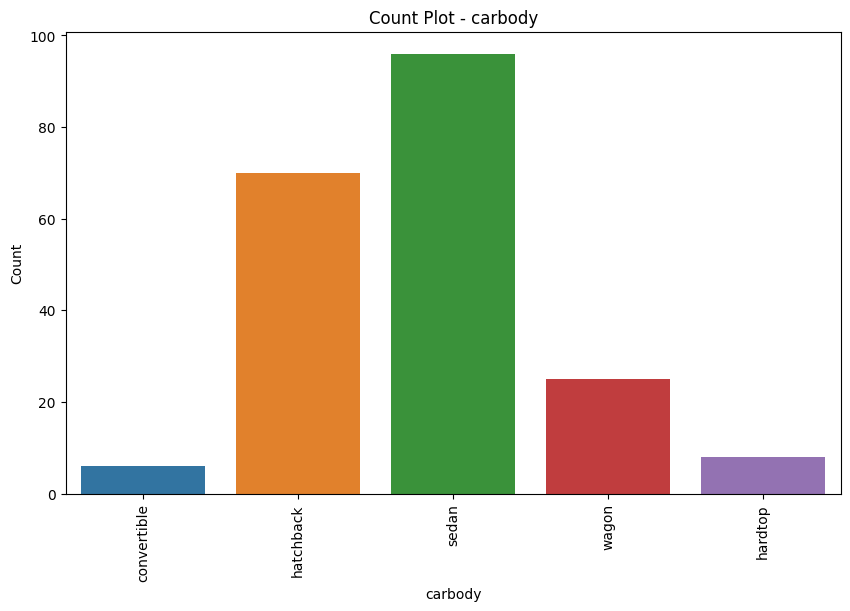

In [ ]:
count_plot('carbody')

In [ ]:
data['compressionratio'].value_counts().reset_index()

,index,compressionratio
0,9.00,46
1,9.40,26
2,8.50,14
3,9.50,13
4,9.30,11
5,8.70,9
6,8.00,8
7,9.20,8
8,7.00,7
9,8.60,5


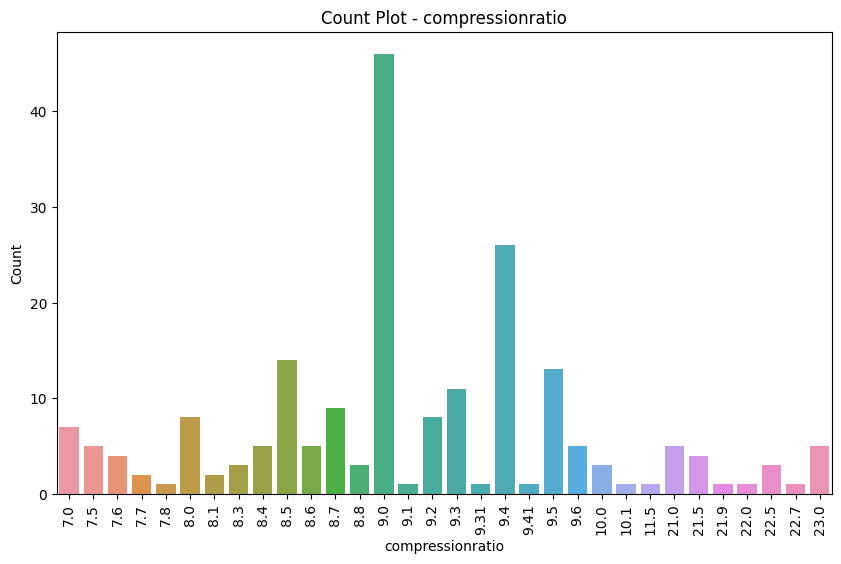

In [ ]:
count_plot('compressionratio')

In [ ]:
data['enginetype'].value_counts().reset_index()

,index,enginetype
0,ohc,148
1,ohcf,15
2,ohcv,13
3,dohc,12
4,l,12
5,rotor,4
6,dohcv,1


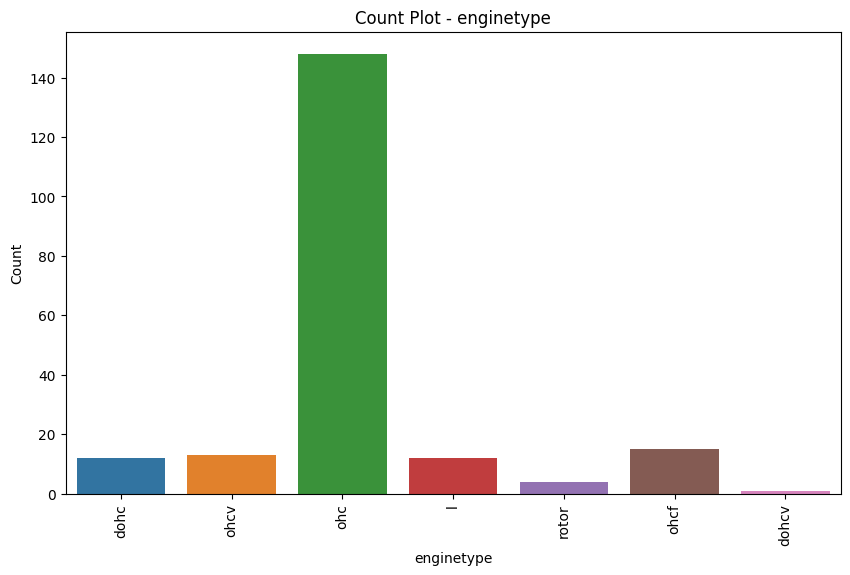

In [ ]:
count_plot('enginetype')

In [ ]:
categorical = data.select_dtypes(include=object).columns.tolist()
numerical = data.select_dtypes(exclude=object).columns.tolist()

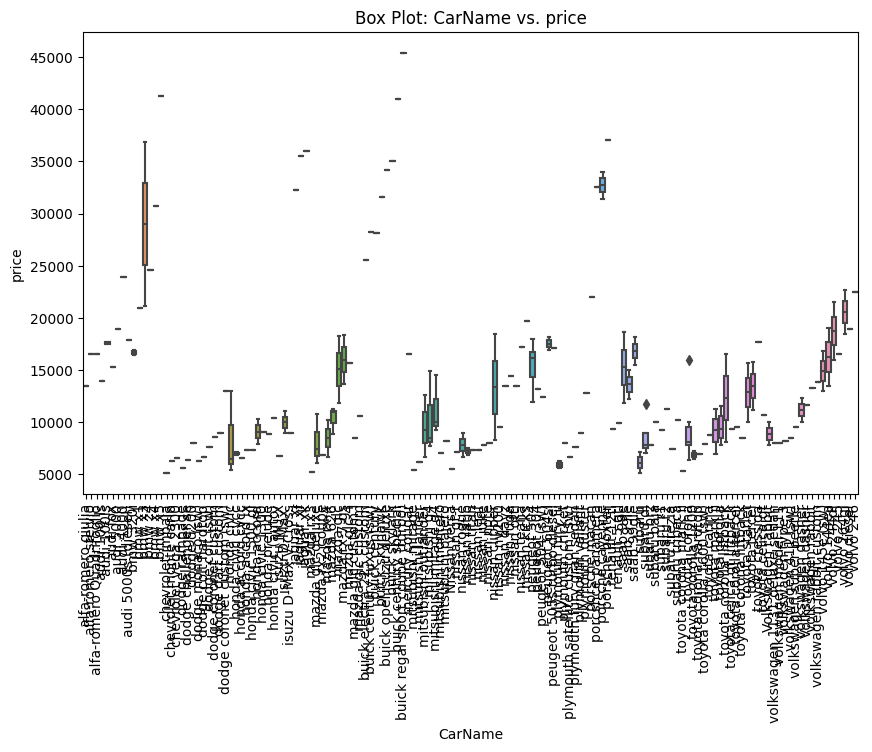

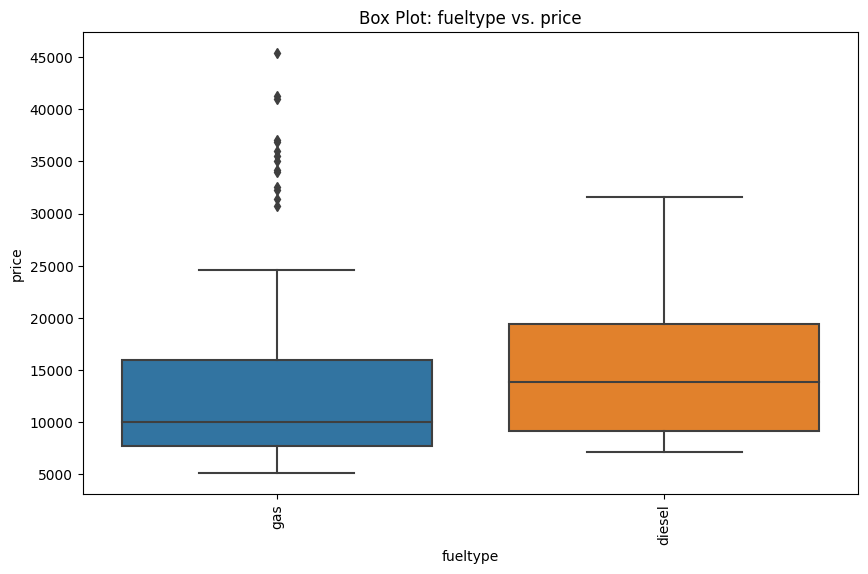

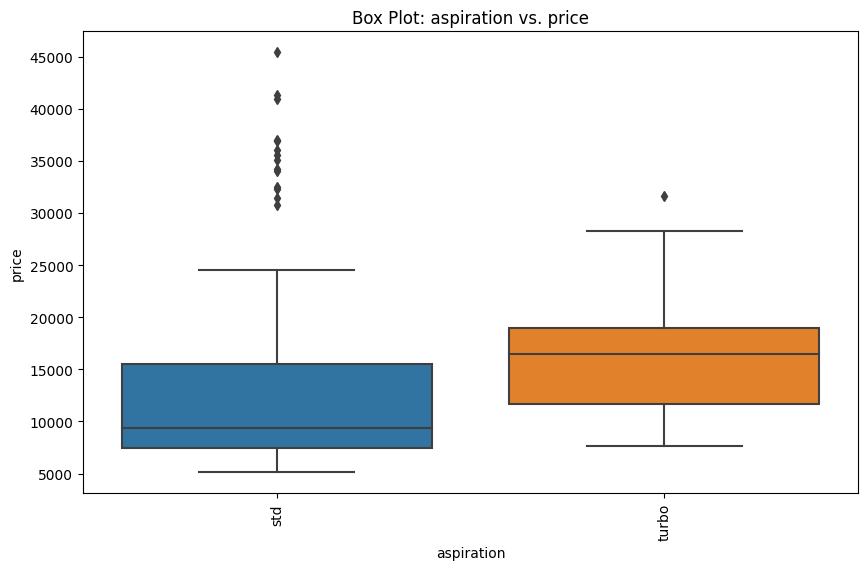

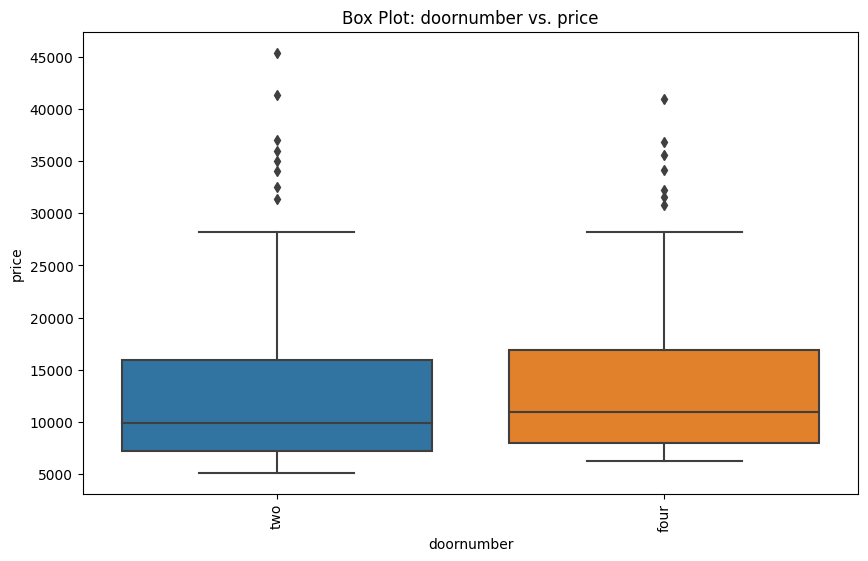

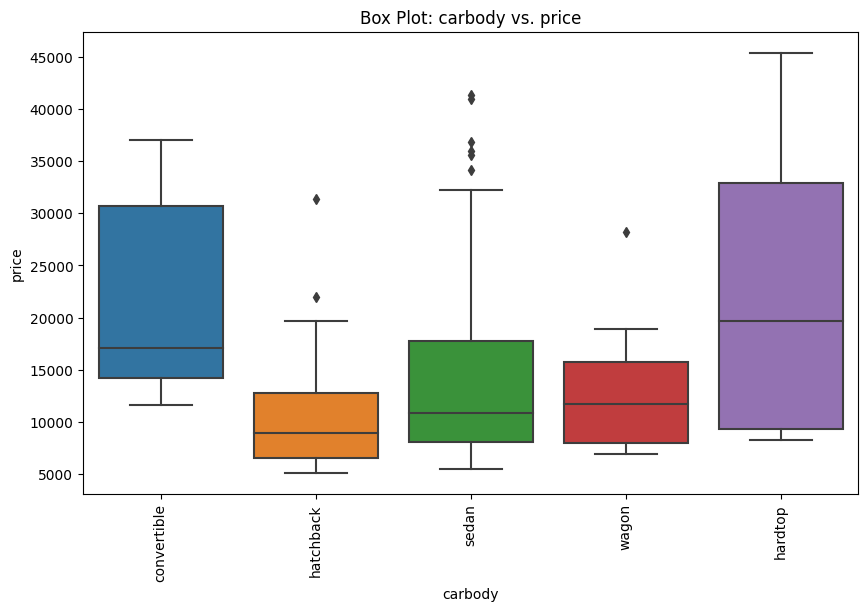

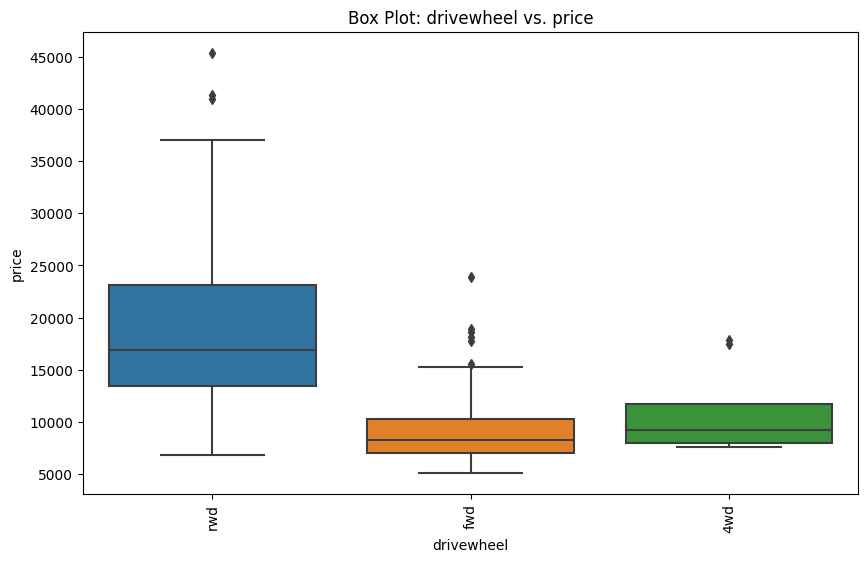

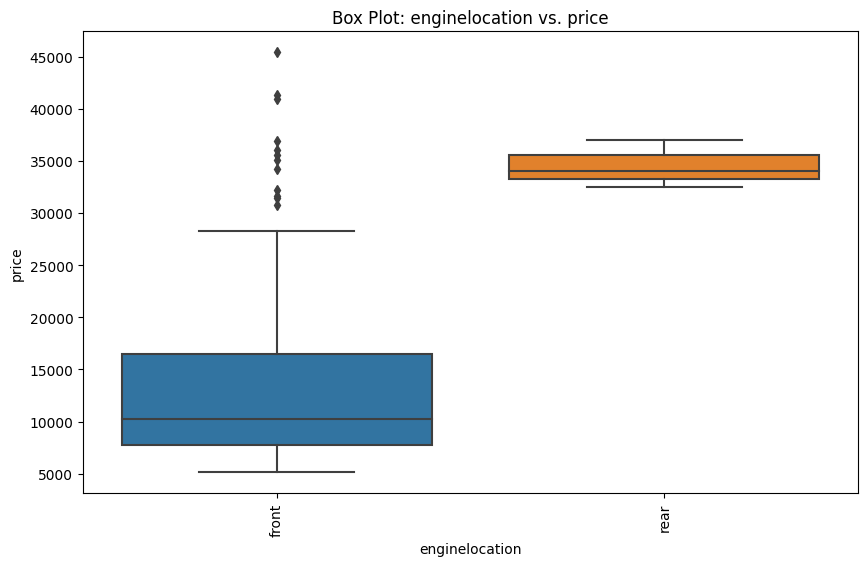

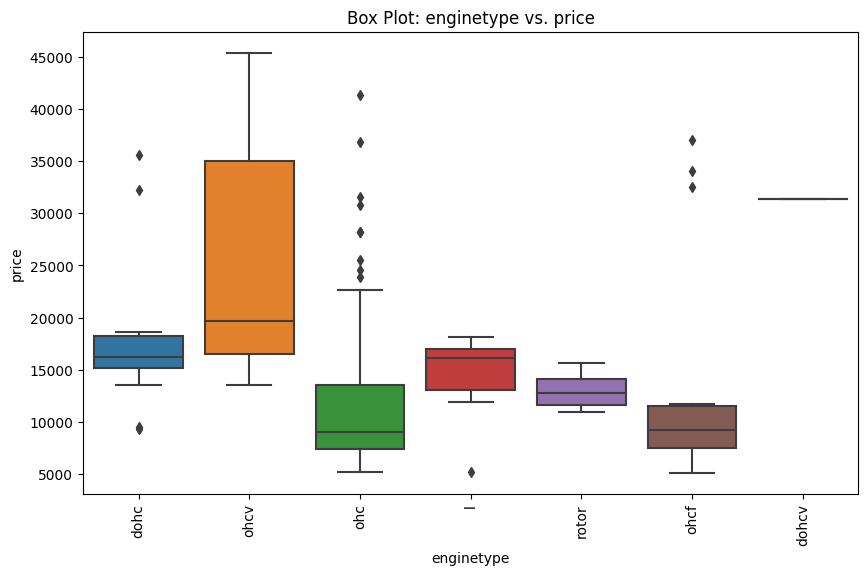

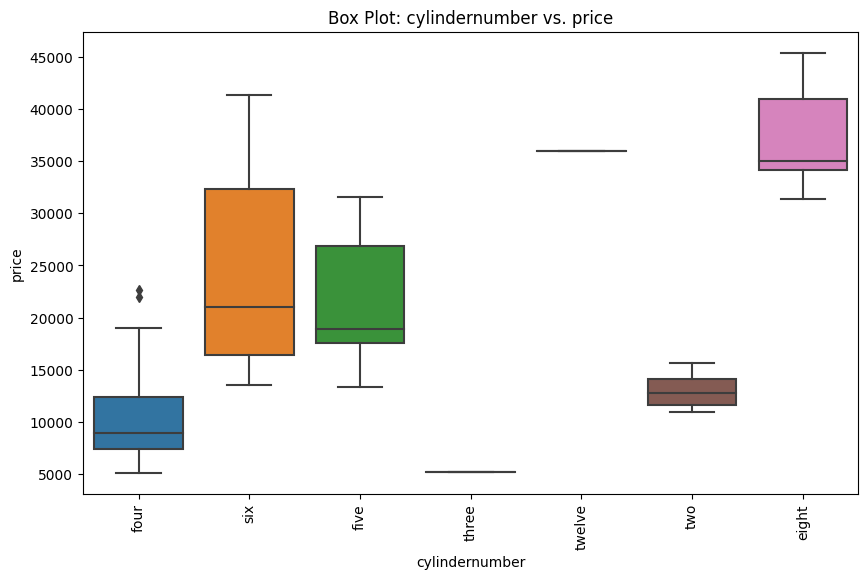

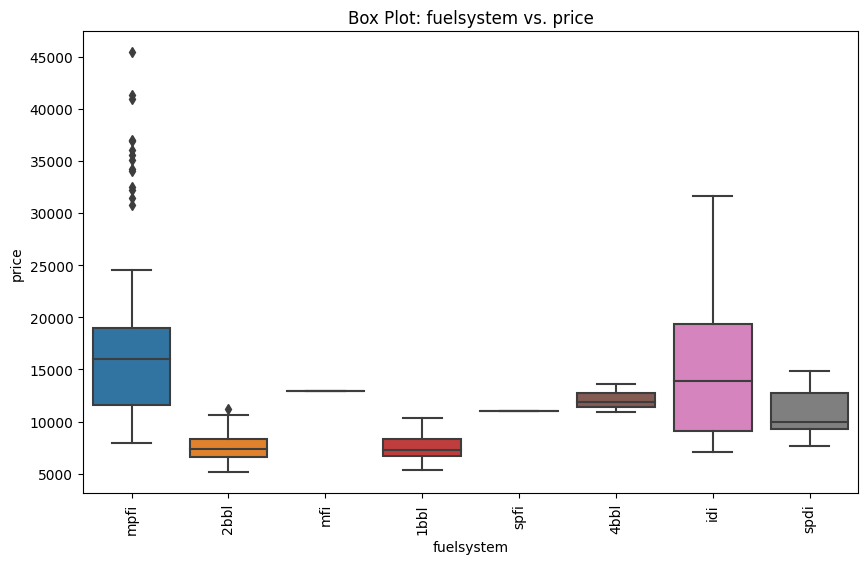

In [ ]:
for i in categorical:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=i,y='price',data=data)
  plt.title(f'Box Plot: {i} vs. price')
  plt.xlabel(i)
  plt.ylabel('price')
  plt.xticks(rotation=90)
  plt.show()

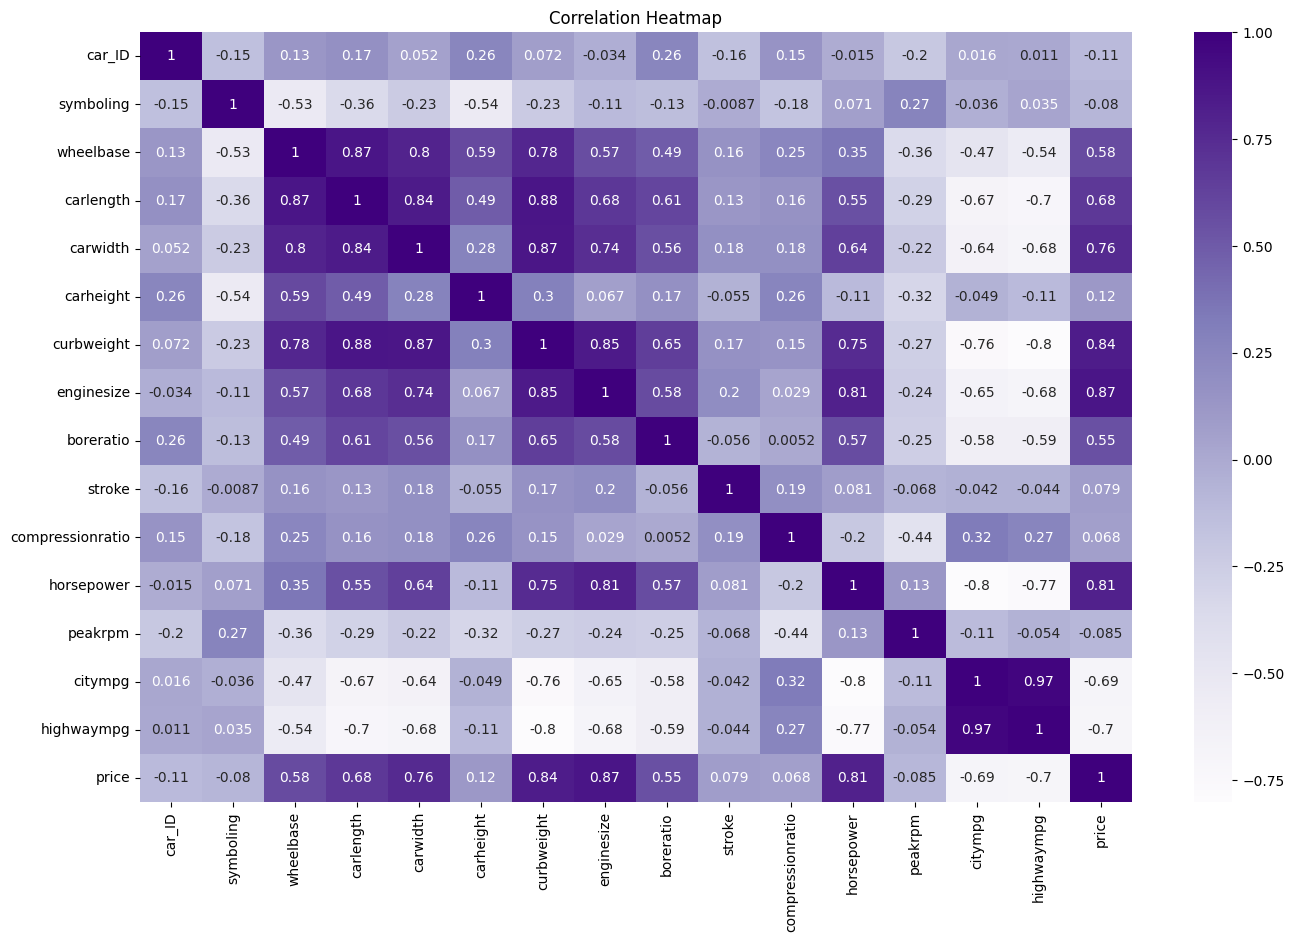

In [ ]:
correlation_matrix = data[numerical].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples')
plt.title("Correlation Heatmap")
plt.show()

*Data Manipulation*

In [ ]:
dropped_columns = ['car_ID', 'symboling']

data.drop(columns=dropped_columns, inplace=True)

In [ ]:
numerical.remove('car_ID')
numerical.remove('symboling')

In [ ]:
print(data.columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [ ]:
label_encoder = LabelEncoder()
for column in categorical:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
k = StandardScaler()
data[numerical]=k.fit_transform(data[numerical])

*Training the model*

In [ ]:
x = data.drop(['price'],axis=1)
y = data['price']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)

0.9109793516617736

In [ ]:
y_prediction = lr.predict(x_test)

In [ ]:
m = mean_squared_error(y_test, y_prediction)
r2_square = r2_score(y_test,y_prediction)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {m}')

 R-squared: 0.8434647771810279
Mean Squared Error: 0.19457463519403137
